In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Preprocessing

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/2-Faza-Grace/refs/heads/master/Data/asia_df.csv')
df.head(5)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Armenia,Yerevan,40.18,44.51,Asia/Yerevan,1715849100,2024-05-16 12:45:00,19.0,66.2,Partly cloudy,...,0.8,0.9,1,1,05:45 AM,08:12 PM,01:17 PM,02:31 AM,Waxing Gibbous,55
2,Azerbaijan,Baku,40.40,49.88,Asia/Baku,1715849100,2024-05-16 12:45:00,17.0,62.6,Partly cloudy,...,1.9,2.2,1,1,05:23 AM,07:51 PM,12:54 PM,02:10 AM,Waxing Gibbous,55
3,Bahrain,Manama,26.24,50.58,Asia/Bahrain,1715849100,2024-05-16 11:45:00,36.0,96.8,Sunny,...,39.0,114.3,2,4,04:50 AM,06:18 PM,12:10 PM,12:45 AM,Waxing Gibbous,55
4,Bangladesh,Dhaka,23.72,90.41,Asia/Dhaka,1715849100,2024-05-16 14:45:00,38.4,101.2,Partly Cloudy,...,49.7,57.0,3,6,05:16 AM,06:34 PM,12:28 PM,12:58 AM,Waxing Gibbous,55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650 entries, 0 to 13649
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       13650 non-null  object 
 1   location_name                 13650 non-null  object 
 2   latitude                      13650 non-null  float64
 3   longitude                     13650 non-null  float64
 4   timezone                      13650 non-null  object 
 5   last_updated_epoch            13650 non-null  int64  
 6   last_updated                  13650 non-null  object 
 7   temperature_celsius           13650 non-null  float64
 8   temperature_fahrenheit        13650 non-null  float64
 9   condition_text                13650 non-null  object 
 10  wind_mph                      13650 non-null  float64
 11  wind_kph                      13650 non-null  float64
 12  wind_degree                   13650 non-null  int64  
 13  w

In [4]:
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['Hari'] = df['last_updated'].dt.day_name()

def classify_energy_consumption(row):
    if row['temperature_celsius'] > 30 or row['temperature_celsius'] < 10:
        return 'Tinggi'
    elif row['precip_mm'] > 30 and row['Hari'] in ['Saturday', 'Sunday']:
        return 'Rendah'
    else:
        return 'Sedang'

df['Kategori Konsumsi Energi'] = df.apply(classify_energy_consumption, axis=1)


In [5]:
missing_values = df.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [6]:
columns = ['Hari', "country", "location_name", "latitude", "longitude", "timezone", "last_updated_epoch", "last_updated", "sunrise", "sunset", "moonrise", "moonset", "moon_phase", "moon_illumination", 'condition_text', 'wind_direction', 'wind_degree']
df = df.drop(columns=columns)

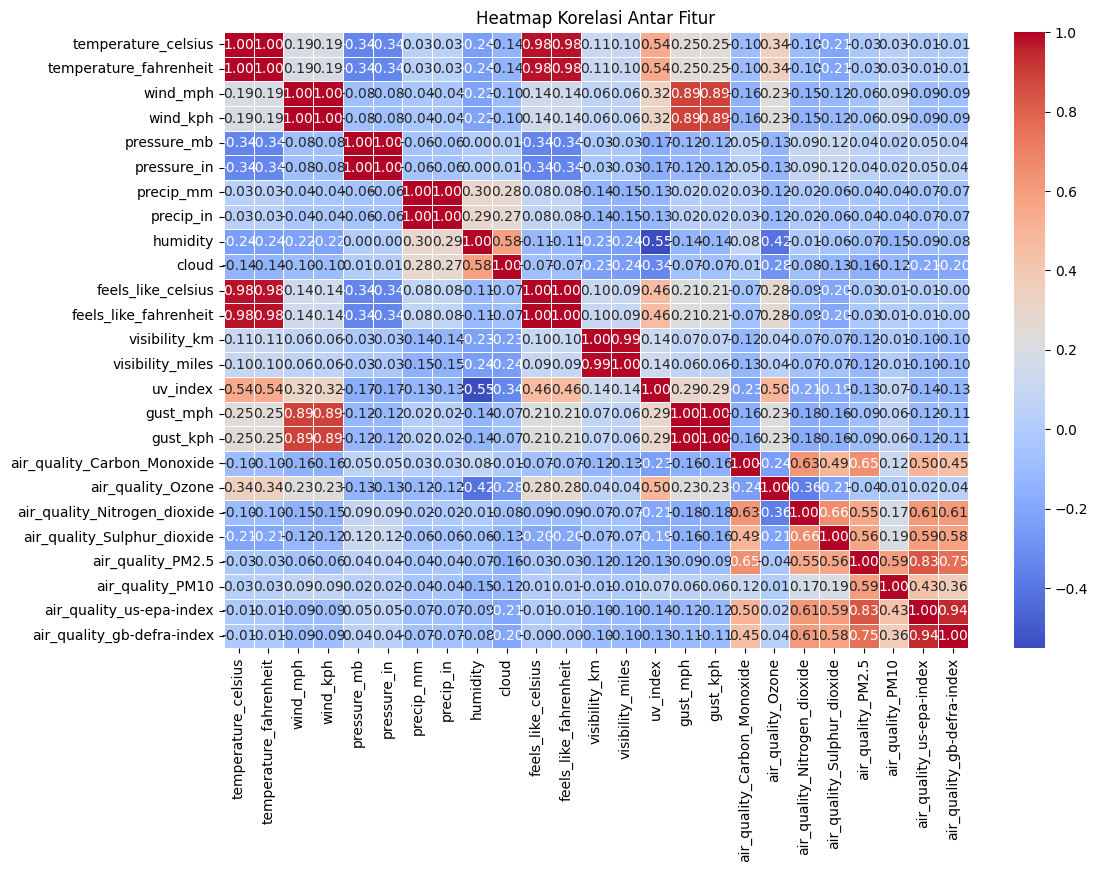

In [7]:
numeric_features = df.select_dtypes(include='number').columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [8]:
column_multikolinearitas = ['gust_mph', 'feels_like_fahrenheit', 'temperature_fahrenheit', 'air_quality_gb-defra-index', 'wind_mph', 'pressure_in', 'visibility_miles', 'precip_in', 'feels_like_celsius', 'gust_kph', 'precip_mm', 'air_quality_us-epa-index']
df.drop(columns=column_multikolinearitas, inplace=True)
df.head(5)

,temperature_celsius,wind_kph,pressure_mb,humidity,cloud,visibility_km,uv_index,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,Kategori Konsumsi Energi
0,26.6,13.3,1012.0,24,30,10.0,7.0,277.0,103.0,1.1,0.2,8.4,26.6,Sedang
1,19.0,6.8,1017.0,40,25,10.0,4.0,186.9,103.0,1.0,0.3,0.8,0.9,Sedang
2,17.0,6.8,1020.0,68,50,10.0,5.0,227.0,81.5,7.1,1.8,1.9,2.2,Sedang
3,36.0,22.0,1007.0,33,0,10.0,8.0,397.2,100.1,18.5,9.7,39.0,114.3,Tinggi
4,38.4,6.8,1006.0,31,30,10.0,9.0,520.7,188.8,8.7,4.7,49.7,57.0,Tinggi


In [9]:
numeric_features = df.select_dtypes(include='number').columns

for col in numeric_features:
    df[col] = df[col].apply(lambda x: df[col].median() if x <= 0 else x)
    
df.head(5)

,temperature_celsius,wind_kph,pressure_mb,humidity,cloud,visibility_km,uv_index,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,Kategori Konsumsi Energi
0,26.6,13.3,1012.0,24,30.0,10.0,7.0,277.0,103.0,1.1,0.2,8.4,26.6,Sedang
1,19.0,6.8,1017.0,40,25.0,10.0,4.0,186.9,103.0,1.0,0.3,0.8,0.9,Sedang
2,17.0,6.8,1020.0,68,50.0,10.0,5.0,227.0,81.5,7.1,1.8,1.9,2.2,Sedang
3,36.0,22.0,1007.0,33,25.0,10.0,8.0,397.2,100.1,18.5,9.7,39.0,114.3,Tinggi
4,38.4,6.8,1006.0,31,30.0,10.0,9.0,520.7,188.8,8.7,4.7,49.7,57.0,Tinggi


In [10]:
df['Kategori Konsumsi Energi'].value_counts()

Kategori Konsumsi Energi
Sedang    8006
Tinggi    5644
Name: count, dtype: int64

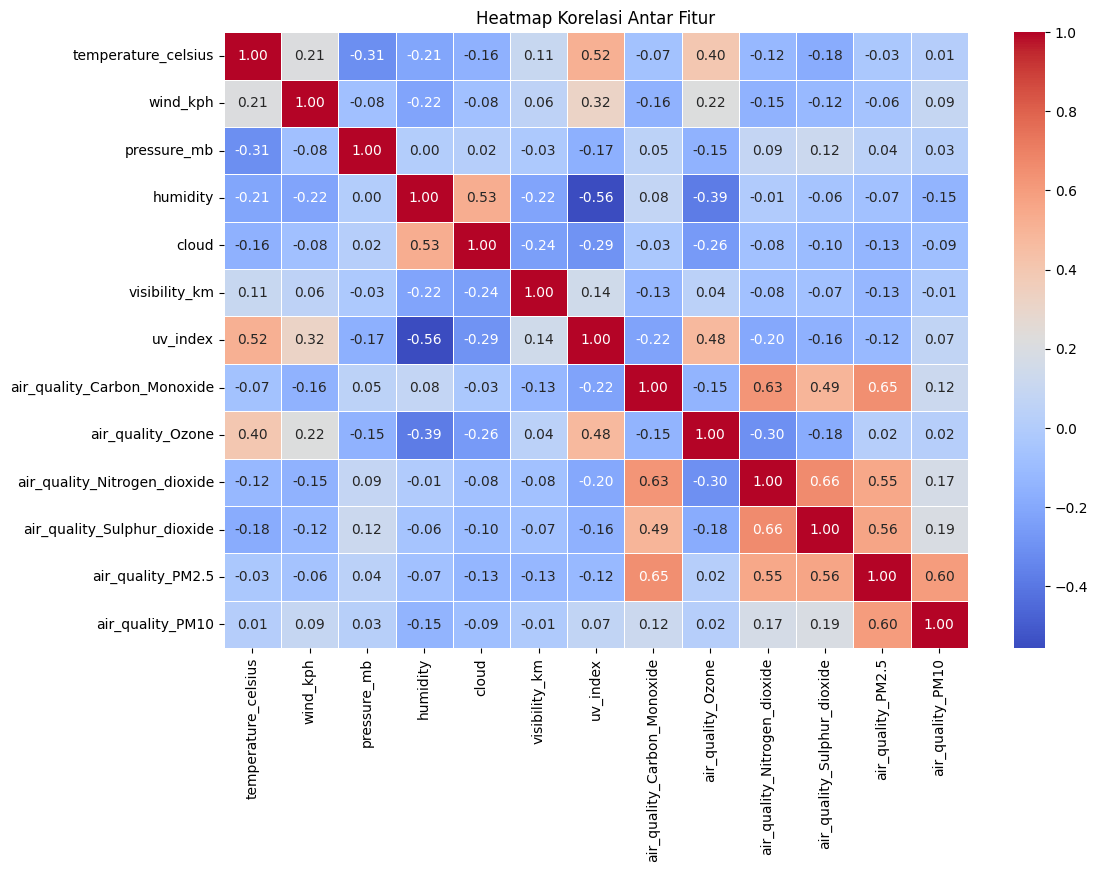

In [11]:
numeric_features = df.select_dtypes(include='number').columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [12]:
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

x = df.drop(columns='Kategori Konsumsi Energi')
y = df['Kategori Konsumsi Energi']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
 
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

threshold = 0.01
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

print('Fitur yang dipilih oleh Embedded Methods (di atas ambang batas)')
for i in important_features_indices:
  print(f'{x.columns[i]}: {importances[i]}')

important_features= x_train.columns[important_features_indices]
x_important = x_train[important_features]

print('\nDimensi data pelatihan dengan fitur penting: ', x_important.shape)

Fitur yang dipilih oleh Embedded Methods (di atas ambang batas)
temperature_celsius: 0.6115795933276018
pressure_mb: 0.10039841808687446
humidity: 0.0331942499372522
cloud: 0.012621502164765543
uv_index: 0.12614363236485526
air_quality_Carbon_Monoxide: 0.019359548890044407
air_quality_Ozone: 0.02869225640554024
air_quality_Nitrogen_dioxide: 0.015747765846527508
air_quality_Sulphur_dioxide: 0.013653064096143685
air_quality_PM2.5: 0.011868465902187356
air_quality_PM10: 0.01387246446399217

Dimensi data pelatihan dengan fitur penting:  (10920, 11)


In [14]:
x_train_important = x_train[important_features]
x_test_important = x_test[important_features]

In [15]:
knn = KNeighborsClassifier().fit(x_train_important, y_train)
dt = DecisionTreeClassifier().fit(x_train_important, y_train)
rf = RandomForestClassifier().fit(x_train_important, y_train)
svm = SVC().fit(x_train_important, y_train)
nb = GaussianNB().fit(x_train_important, y_train)

==== KNN Classifier ====
Confusion Matrix
[[1542   91]
 [  91 1006]]
True Positive TP: 1006
True Negative TN: 1542
False Posiive FP: 91
False Negative FN: 91 
Accuracy: 0.9333
Precision: 0.9307
Recall: 0.9307
F1-Score: 0.9307

 ---------------------------------------- 



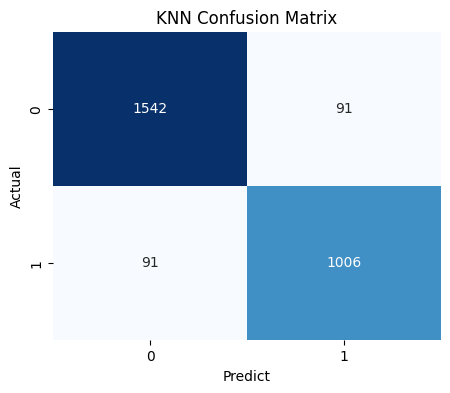

In [22]:
y_pred_knn = knn.predict(x_test_important)
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm_knn.ravel()
print('==== KNN Classifier ====')
print('Confusion Matrix')
print(cm_knn)
print(f'True Positive TP: {tp}')
print(f'True Negative TN: {tn}')
print(f'False Posiive FP: {fp}')
print(f'False Negative FN: {fn} ')
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}')
print(f'Precision: {precision_score(y_test, y_pred_knn, labels=["Sedang", "Tinggi"], average="macro"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_knn, labels=["Sedang", "Tinggi"], average="macro"):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred_knn, labels=["Sedang", "Tinggi"], average="macro"):.4f}')



print('\n', '-'*40, '\n')

plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

==== Decision Tree Classifier ====
Confusion Matrix
[[1632    1]
 [   2 1095]]
True Positive TP: 1095
False Positive FP: 1
True Negative TN: 1632
False Negative FN: 2
Accuracy: 0.9989010989010989
Precision: 0.9989
Recall: 0.9988
F1-Score: 0.9989

 ---------------------------------------- 



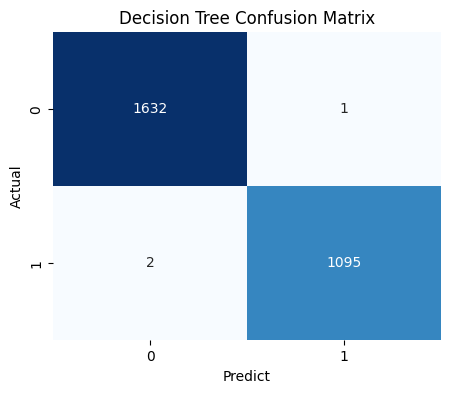

In [23]:
y_pred_dt = dt.predict(x_test_important)
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm_dt.ravel()

print('==== Decision Tree Classifier ====')
print('Confusion Matrix')
print(cm_dt)
print(f'True Positive TP: {tp}')
print(f'False Positive FP: {fp}')
print(f'True Negative TN: {tn}')
print(f'False Negative FN: {fn}')
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt)}')
print(f'Precision: {precision_score(y_test, y_pred_dt, labels=["Sedang", "Tinggi"], average="macro"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_dt, labels=["Sedang", "Tinggi"], average="macro"):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred_dt, labels=["Sedang", "Tinggi"], average="macro"):.4f}')

print('\n', '-'*40, '\n')

plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel("Actual")
plt.show()

==== Random Forest Clasifier ====
Confusion Matrix
[[1633    0]
 [   6 1091]]
True Positive TP: 1091
True Negative TN: 1633
False Positive FP: 0
False Negative FN: 6
Accuracy: 0.9978021978021978
Precision: 0.9982
Recall: 0.9973
F1-Score: 0.9977

 ---------------------------------------- 



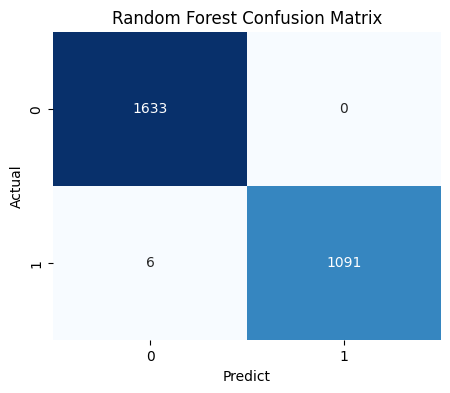

In [24]:
y_pred_rf = rf.predict(x_test_important)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()

print('==== Random Forest Clasifier ====')
print('Confusion Matrix')
print(cm_rf)
print(f'True Positive TP: {tp}')
print(f'True Negative TN: {tn}')
print(f'False Positive FP: {fp}')
print(f'False Negative FN: {fn}')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision: {precision_score(y_test, y_pred_rf, labels=["Sedang", "Tinggi"], average="macro"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_rf, labels=["Sedang", "Tinggi"], average="macro"):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred_rf, labels=["Sedang", "Tinggi"], average="macro"):.4f}')


print('\n', '-'*40, '\n')

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, cmap='Blues', cbar=False, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

==== SVM Classifier ====
Confusion Matrix
[[1592   41]
 [ 132  965]]
True Posotive TP: 965
False Positive FP: 41
True Negative TN: 1592
False Negative FN:: 132
Accuracy: 0.9366300366300366
Precision: 0.9413
Recall: 0.9273
F1-Score: 0.9331

 ---------------------------------------- 



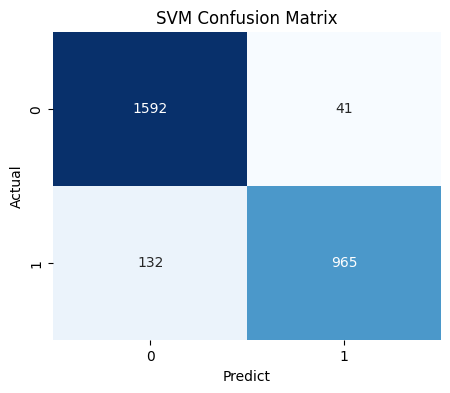

In [25]:
y_pred_svm = svm.predict(x_test_important)
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm_svm.ravel()

print('==== SVM Classifier ====')
print('Confusion Matrix')
print(cm_svm)
print(f'True Posotive TP: {tp}')
print(f'False Positive FP: {fp}')
print(f'True Negative TN: {tn}')
print(f'False Negative FN:: {fn}')
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision: {precision_score(y_test, y_pred_svm, labels=["Sedang", "Tinggi"], average="macro"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_svm, labels=["Sedang", "Tinggi"], average="macro"):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred_svm, labels=["Sedang", "Tinggi"], average="macro"):.4f}')

print('\n', '-'*40, '\n')

plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, cmap='Blues', cbar=False, fmt='d')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

==== Naive Bayes Classifier ====
Confusion Matrix
[[1319  314]
 [ 264  833]]
True Posotive TP: 833
False Positive FP: 314
True Negative TN: 1319
False Negative FN:: 264
Accuracy: 0.7882783882783883
Precision: 0.7797
Recall: 0.7835
F1-Score: 0.7813

 ---------------------------------------- 



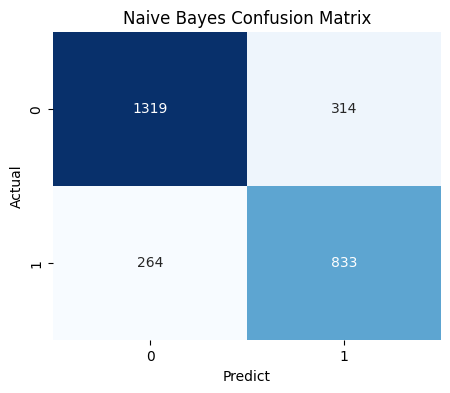

In [26]:
y_pred_nb = nb.predict(x_test_important)
cm_nb = confusion_matrix(y_test, y_pred_nb)
tn, fp, fn, tp = cm_nb.ravel()

print('==== Naive Bayes Classifier ====')
print('Confusion Matrix')
print(cm_nb)
print(f'True Posotive TP: {tp}')
print(f'False Positive FP: {fp}')
print(f'True Negative TN: {tn}')
print(f'False Negative FN:: {fn}')
print(f'Accuracy: {accuracy_score(y_test, y_pred_nb)}')
print(f'Precision: {precision_score(y_test, y_pred_nb, labels=["Sedang", "Tinggi"], average="macro"):.4f}')
print(f'Recall: {recall_score(y_test, y_pred_nb, labels=["Sedang", "Tinggi"], average="macro"):.4f}')
print(f'F1-Score: {f1_score(y_test, y_pred_nb, labels=["Sedang", "Tinggi"], average="macro"):.4f}')

print('\n', '-'*40, '\n')

plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, cmap='Blues', cbar=False, fmt='d')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [28]:
def evaluate_model(model, x_test, y_test):
  y_pred = model.predict(x_test_important)
  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  results = {
      'Confusion Matrix' : cm,
      'True Positive (TP)' : tp,
      'False Positive (FP)' : fp,
      'False Negative (FN)' : fn,
      'True Negative (TN)' : tn,
      'Accuracy' : accuracy_score(y_test, y_pred, ),
      'Precision' : precision_score(y_test, y_pred, labels=["Sedang", "Tinggi"], average="macro"),
      'Recall' : recall_score(y_test, y_pred, labels=["Sedang", "Tinggi"], average="macro"),
      'F1-Score' : f1_score(y_test, y_pred, labels=["Sedang", "Tinggi"], average="macro")
  }
  return results

results = {
    'K-Nearest Neighbors (KNN)' : evaluate_model(knn, x_test_important,y_test),
    'Decision Tree (DT)' : evaluate_model(dt, x_test_important, y_test),
    'Random Forest (RF)' : evaluate_model(rf, x_test_important, y_test),
    'Support Vector Machine (SVM)' : evaluate_model(svm, x_test_important, y_test),
    'Naive Bayes (NB)' : evaluate_model(nb, x_test_important, y_test)
}

rows = []
for model_name, metrics in results.items():
  rows.append({
      'Model' : model_name,
      'Accuracy' : metrics['Accuracy'],
      'Precision' : metrics['Precision'],
      'Recall' : metrics['Recall'],
      'F1-Score' : metrics['F1-Score']
  })

summary_df = pd.DataFrame(rows)

print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.933333   0.930660  0.930660  0.930660
1            Decision Tree (DT)  0.998901   0.998932  0.998782  0.998857
2            Random Forest (RF)  0.997802   0.998170  0.997265  0.997712
3  Support Vector Machine (SVM)  0.936630   0.941339  0.927282  0.933101
4              Naive Bayes (NB)  0.788278   0.779735  0.783530  0.781349
